# Assignment 4 | Shravan Kumar Undaru

## #Q0

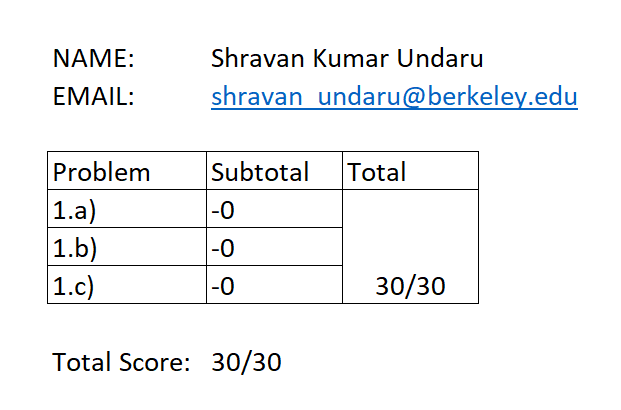

# #Q1

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import math
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
pwd()

'C:\\Users\\shrav\\Documents\\Courses\\242 - Applications in Data Analytics\\Homework 242\\242 hw 4'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '242 - HW4 SU.ipynb',
 'Letters_test.csv',
 'Letters_train.csv']

In [4]:
#Reading the datasets
df_train = pd.read_csv('Letters_train.csv')
df_test = pd.read_csv('Letters_test.csv')

In [5]:
#Checking columns in the datasets
df_train.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgeycor',
       'yedge', 'yedgexcor'],
      dtype='object')

In [6]:
#Checking the null count and data type in different columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   letter     2181 non-null   object
 1   xbox       2181 non-null   int64 
 2   ybox       2181 non-null   int64 
 3   width      2181 non-null   int64 
 4   height     2181 non-null   int64 
 5   onpix      2181 non-null   int64 
 6   xbar       2181 non-null   int64 
 7   ybar       2181 non-null   int64 
 8   x2bar      2181 non-null   int64 
 9   y2bar      2181 non-null   int64 
 10  xybar      2181 non-null   int64 
 11  x2ybar     2181 non-null   int64 
 12  xy2bar     2181 non-null   int64 
 13  xedge      2181 non-null   int64 
 14  xedgeycor  2181 non-null   int64 
 15  yedge      2181 non-null   int64 
 16  yedgexcor  2181 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 289.8+ KB


In [7]:
#Getting the distribution of continuous variables in the dataset
df_train.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgeycor,yedge,yedgexcor
count,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000
mean,3.906006,7.070610,5.189821,5.293443,3.862448,7.485557,7.180651,4.689133,3.881247,8.537827,4.500688,6.713434,2.885832,7.773957,4.562586,8.412196
std,1.869324,3.409318,1.867075,2.272714,2.192641,1.896254,2.848372,2.262907,1.867914,2.075427,2.007469,2.061875,1.799155,1.680645,2.056396,1.702997
min,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,2.000000,7.000000,3.000000,6.000000,2.000000,7.000000,3.000000,7.000000
50%,4.000000,7.000000,5.000000,6.000000,4.000000,7.000000,7.000000,4.000000,4.000000,8.000000,5.000000,7.000000,2.000000,8.000000,4.000000,8.000000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,9.000000,9.000000,6.000000,5.000000,10.000000,6.000000,8.000000,4.000000,9.000000,6.000000,10.000000
max,12.000000,15.000000,11.000000,12.000000,12.000000,14.000000,15.000000,11.000000,8.000000,14.000000,10.000000,14.000000,10.000000,13.000000,12.000000,13.000000


In [8]:
#Spot checking the dataset
df_train.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgeycor,yedge,yedgexcor
0,B,2,6,4,4,3,8,8,5,7,7,6,6,2,8,6,9
1,R,4,8,5,6,4,7,8,6,5,7,6,8,3,7,6,9
2,B,4,8,6,6,7,8,7,6,3,7,8,7,6,10,8,9
3,A,5,6,7,5,5,8,8,3,5,7,9,8,5,9,4,6
4,B,2,5,5,3,3,9,6,3,6,10,4,7,4,7,6,9


In [9]:
#Checking Missing value percentage in dataset
round(100*df_train.isna().sum()/len(df_train),2)

letter       0.0
xbox         0.0
ybox         0.0
width        0.0
height       0.0
onpix        0.0
xbar         0.0
ybar         0.0
x2bar        0.0
y2bar        0.0
xybar        0.0
x2ybar       0.0
xy2bar       0.0
xedge        0.0
xedgeycor    0.0
yedge        0.0
yedgexcor    0.0
dtype: float64

### #Q.1A 

In [10]:
#Creating a variable which is equal to "1" (Yes) if letter is "B" and "0" (No) otherwise
df_train['isB'] = np.where(df_train['letter']=='B', 1,0)
df_test['isB'] = np.where(df_test['letter']=='B', 1,0)

In [11]:
#Understanding the distribution of restaurants across the two category of star ratings
round(df_train['isB'].value_counts()/len(df_train),2), round(df_test['isB'].value_counts()/len(df_test),2)
#56% of the restaurants have above 4 stars

(0    0.76
 1    0.24
 Name: isB, dtype: float64,
 0    0.75
 1    0.25
 Name: isB, dtype: float64)

### #Q.1.A.i Baseline model (response "isB")

Preformance of the baseline model for predicting "isB"  (predicting majority class)

In [12]:
#majority class of the baseline  model: "isB" = No

#performance
tpr_baseline = 0
fpr_baseline = 0
accuracy_baseline =sum(df_test['isB'] == 0)/len(df_test)
print("Accuracy of Baseline model (response - isB):", round(accuracy_baseline,4))

#Accuracy = 74.65%
#TPR = 0 (since predictions are for negative class which is the minority class)
#FPR = 0 

Accuracy of Baseline model (response - isB): 0.7465


### #Q.A.ii Logistic Regression

In [13]:
#Creating a categorical response variable "isB"
#Dropping the "Letter" feature from training and test data
df_train_isB = df_train.copy()
df_train_isB.drop(columns =['letter'], axis = 1, inplace = True)

df_test_isB = df_test.copy()
df_test_isB.drop(columns =['letter'], axis = 1, inplace = True)

In [14]:
#Predicting performance of classification models
def perf_predict(y_pred_test,model_type):
    #Determining the permormance metrics
    tp=sum((y_pred_test['Predict']==y_pred_test['Test']) & (y_pred_test['Predict']==1))
    tn=sum((y_pred_test['Predict']==y_pred_test['Test']) & (y_pred_test['Predict']==0))
    fp=sum((y_pred_test['Predict']!=y_pred_test['Test']) & (y_pred_test['Predict']==1))
    fn=sum((y_pred_test['Predict']!=y_pred_test['Test']) & (y_pred_test['Predict']==0))
    
    #TPR, FPR, Accuracy
    TPR = tp/(tp+fn)
    FPR = fp/(fp+tn)
    accuracy = (tp+tn)/(tn+tp+fn+fp)
    print(model_type, " :")
    print("TPR: ", round(TPR,4))
    print("FPR: ", round(FPR,4))
    print("Accuracy: ", round(accuracy,4))
    
    return TPR, FPR, accuracy    

In [15]:
#Building a logistic regression model
def log_reg_fn(train, test):
    train=sm.add_constant(train.copy())
    test=sm.add_constant(test.copy())
    x_train=train.drop(columns='isB', axis=1)
    y_train=train['isB']
    x_test=test.drop(columns='isB', axis=1)
    y_test=test['isB']
    
    logreg = sm.Logit(y_train,x_train).fit()
    
    #predictions
    y_predict_logreg = logreg.predict(x_test)
    
    #predicting output
    predict_merged_cart_csf = pd.DataFrame(list(zip(list(y_test),list(y_predict_logreg))), columns = ['Test','Predict_prob'])
    predict_merged_cart_csf['Predict'] = np.where(predict_merged_cart_csf['Predict_prob']>= 0.5, 1,0)
    
    print(logreg.summary())
    return logreg,predict_merged_cart_csf

In [16]:
logreg,predict_merged_logreg=log_reg_fn(df_train_isB,df_test_isB)

Optimization terminated successfully.
         Current function value: 0.155134
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                    isB   No. Observations:                 2181
Model:                          Logit   Df Residuals:                     2164
Method:                           MLE   Df Model:                           16
Date:                Mon, 08 Nov 2021   Pseudo R-squ.:                  0.7200
Time:                        00:37:22   Log-Likelihood:                -338.35
converged:                       True   LL-Null:                       -1208.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.5595      2.303     -5.888      0.000     -18.073      -9.046
xbox           0.0835      0

In [17]:
tpr_logreg,fpr_logreg,acc_logreg=perf_predict(predict_merged_logreg, "Logistic Regression")

Logistic Regression  :
TPR:  0.8987
FPR:  0.0444
Accuracy:  0.9412


### #Q.1.iii. AUC for Logistic regression model (AUC=0.91)

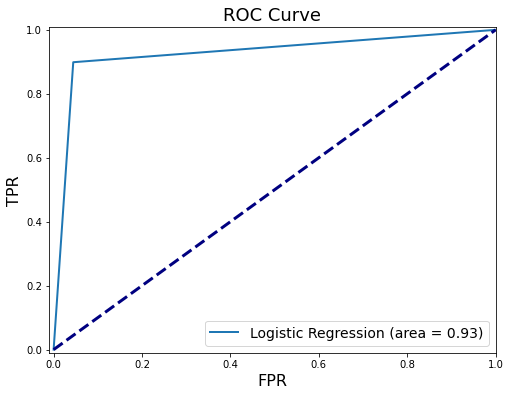

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(predict_merged_logreg['Test'], predict_merged_logreg['Predict'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=2, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

### Q.1.iv. CART Classification

In [19]:
#Function to train a CART classification model, choose ccp-alpha using cross-validation, and determine performance
from sklearn.model_selection import GridSearchCV

def cart_grid_search(train, response):
    #Splitting the x and y datasets
    x_train_cart_csf = train.copy().drop(columns=[response], axis=1)
    y_train_cart_csf = train[response]
    
    #Exhaustive search over specified parameter values for an estimator.

    grid_values = {'ccp_alpha': np.linspace(0.0, 0.1, 201),
                   'min_samples_leaf': [5],
                   'min_samples_split': [20],
                   'max_depth': [30],
                   'random_state': [88]} 

    dtc = DecisionTreeClassifier()
    dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 
    # default scoring metric to optimize is accuracy, used as default if none given.
    dtc_cv_acc.fit(x_train_cart_csf, y_train_cart_csf)       
    
    acc = dtc_cv_acc.cv_results_['mean_test_score'] 
    # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
    ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data
#     nodes_count=dtc_cv_acc.tree_.node_count

    df=pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)
    
    #Plotting the validation accuracy for different CCP alphas
    plt.figure(figsize=(8, 6))
    plt.xlabel('ccp alpha', fontsize=16)
    plt.ylabel('mean validation accuracy', fontsize=16)
    plt.scatter(ccp, acc, s=2)
    plt.plot(ccp, acc, linewidth=3)
    plt.grid(True, which='both')
    plt.show()

    print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
    print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)
    
    return df

In [20]:
def cart_classification(ccp_alpha_value, train, test, response,class_names_for_plot=['0','1']):
    #Splitting the x and y datasets
    x_train_cart_csf = train.copy().drop(columns=[response], axis=1)
    y_train_cart_csf = train[response]

    x_test_cart_csf = test.copy().drop(columns=[response], axis=1)
    y_test_cart_csf = test[response]
    
    dtc3 = DecisionTreeClassifier(min_samples_leaf=5, 
                              ccp_alpha=ccp_alpha_value,
                              random_state = 88)

    dtc3 = dtc3.fit(x_train_cart_csf, y_train_cart_csf)

    print('Node count =', dtc3.tree_.node_count)
    plt.figure(figsize=(11,9))
    plot_tree(dtc3, 
              feature_names=x_train_cart_csf.columns, 
              class_names=class_names_for_plot, 
              filled=True,
              impurity=False,
              rounded=True,
              fontsize=12) 
    plt.show()

    y_pred_cart_csf = dtc3.predict(x_test_cart_csf)
    
    #Output in a dataframe
    predict_merged_cart_csf = pd.DataFrame(list(zip(list(y_test_cart_csf),list(y_pred_cart_csf))), columns = ['Test','Predict'])

    return predict_merged_cart_csf

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


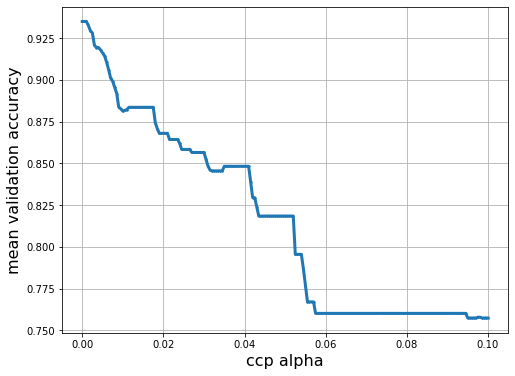

Grid best parameter ccp_alpha (max. accuracy):  0.0
Grid best score (accuracy):  0.9348833312387417


In [21]:
#Gridsearch

# cclp_alpha_cart,df_ccp_alpha, predict_cart= cart_classification(df_train_isB, df_test_isB, "isB")
ccp_alpha_df =cart_grid_search(df_train_isB, "isB")

In [22]:
ccp_alpha_df.head(10)

,ccp alpha,Validation Accuracy
0,0.0,0.934883
1,0.0005,0.934883
2,0.001,0.934883
3,0.0015,0.932594
4,0.002,0.929385
5,0.0025,0.928011
6,0.003,0.920672
7,0.0035,0.919295
8,0.004,0.919295
9,0.0045,0.917921


#### #Q Explain how you did the cross-validation and how you selected the ccp alpha value
Grid Search CV was used to iterate through different values of ccp alpha value. The final ccp alpha was chosen so as to maximize the accuracy for the cross validation set.

Node count = 155


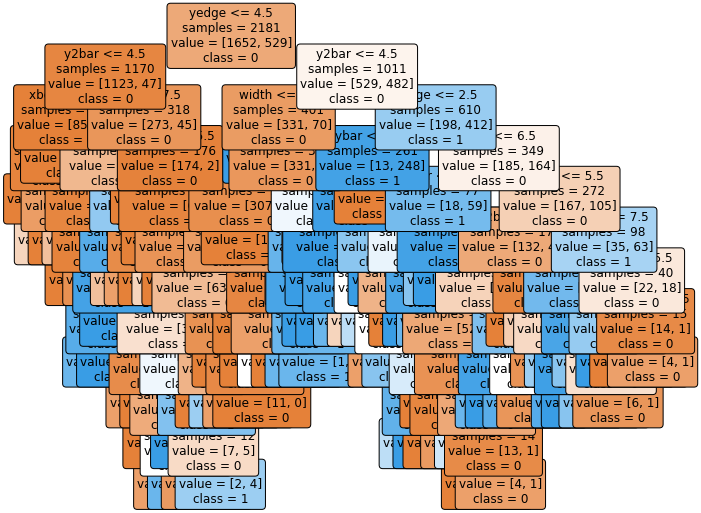

In [23]:
#Cart classification
predict_merged_cart_csf=cart_classification(0.00,df_train_isB, df_test_isB, 'isB')

In [24]:
#Getting performance of CART classification model
tpr_cart_csf,fpr_cart_csf,acc_cart_csf=perf_predict(predict_merged_cart_csf, "Cart Classification")

Cart Classification  :
TPR:  0.8903
FPR:  0.0501
Accuracy:  0.9348


### #Q.1.v. Random Forest

Function to perform gridsearch on max_features parameter in a random forest model

In [65]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

def random_forest_gridSearch(max_features_grid_value,train,response,plot_x_lims=[1, 11],plot_y_lims=[0.9,1]):
    #Splitting the x and y datasets
    x_train = train.copy().drop(columns=[response], axis=1)
    y_train = train[response]

    tic = time.time()

    rfc = RandomForestClassifier() 
    grid_values = {
        'max_features': max_features_grid_value,
        'min_samples_leaf':[5],
        'n_estimators': [500],
        'random_state': [88]
    }
    rf_cv = GridSearchCV(estimator=rfc, param_grid=grid_values, scoring='accuracy', cv= 5)
    rf_cv.fit(x_train,y_train)

    print ("Best Parameters: ",rf_cv.best_params_)
    
    toc = time.time()
    print('time:', round(toc-tic, 2),'s')

    max_features = rf_cv.cv_results_['param_max_features'].data
    Accuracy_score = rf_cv.cv_results_['mean_test_score']

    plt.figure(figsize=(8, 6))
    plt.xlabel('max features', fontsize=16)
    plt.ylabel('CV Accuracy', fontsize=16)
    plt.scatter(max_features, Accuracy_score, s=30)
    plt.plot(max_features, Accuracy_score, linewidth=3)
    plt.grid(True, which='both')
    plt.xlim(plot_x_lims)
    plt.ylim(plot_y_lims)
    
    

Best Parameters:  {'max_features': 2, 'n_estimators': 100, 'random_state': 88}
time: 12.62 s


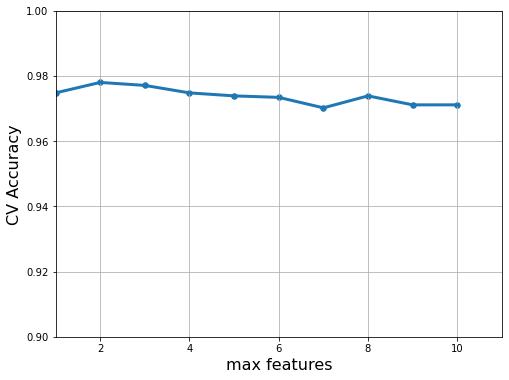

In [26]:
random_forest_gridSearch(np.linspace(1,10,10, dtype='int32'),df_train_isB, "isB")

#### Random forest model with default parameters

In [27]:
#Fitting model with default parameters
rf_model=RandomForestClassifier(random_state=88)
rf_model.fit(df_train_isB.copy().drop(columns=["isB"], axis=1),df_train_isB["isB"])
y_predict_rf=rf_model.predict(df_test_isB.copy().drop(columns=["isB"]))
                           
#Output in a dataframe
predict_merged_rf_csf = pd.DataFrame(list(zip(list(df_test_isB['isB']),list(y_predict_rf))), columns = ['Test','Predict'])

#Performance of Random Forest Classification
tpr_rf,fpr_rf,acc_rf=perf_predict(predict_merged_rf_csf, "Random Forest")

Random Forest  :
TPR:  0.9747
FPR:  0.0186
Accuracy:  0.9797


### #Q1.A.vi: Plotting the table with performance metrics for different models (response "isB")

In [28]:
log_reg_perf = ['Logistic Regression',tpr_logreg,fpr_logreg,acc_logreg]
cart_clasf_perf = ['CART Classification', tpr_cart_csf,fpr_cart_csf,acc_cart_csf]
rf_perf=['Random Forest',tpr_rf,fpr_rf,acc_rf]
baseline_perf = ['Baseline', tpr_baseline, fpr_baseline, accuracy_baseline]

round(pd.DataFrame([log_reg_perf,cart_clasf_perf,rf_perf,baseline_perf], columns = ['Model','TRP','FPR','Accuracy']),4)

,Model,TRP,FPR,Accuracy
0,Logistic Regression,0.8987,0.0444,0.9412
1,CART Classification,0.8903,0.0501,0.9348
2,Random Forest,0.9747,0.0186,0.9797
3,Baseline,0.0000,0.0000,0.7465


Random Forest model has the best performance on the test set. For this application, interpretability is less important that accuracy since the results need not be "justified" or "explained" to the stakeholders.

### #Q1.B.i: Baseline model for predicting "Letter" 

In [29]:
df_train['letter'].value_counts()
#P has the highest count

P    578
A    562
B    529
R    512
Name: letter, dtype: int64

In [30]:
#Baseline model would predict all test data points as "P"  
accuracy_baseline_letter=sum(df_test['letter']=="P")/len(df_test)
print("accuracy of baseline for predicting letter: ", round(accuracy_baseline_letter,4))

accuracy of baseline for predicting letter:  0.2406


### #Q1.B.ii: Cart model for classifying letters

In [31]:
#Creating training data with letters
df_train.drop(columns='isB', axis=1, inplace=True)
df_test.drop(columns='isB', axis=1, inplace=True)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


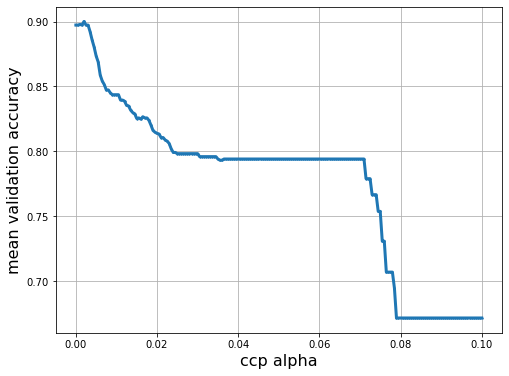

Grid best parameter ccp_alpha (max. accuracy):  0.002
Grid best score (accuracy):  0.9000523647941016


In [32]:
ccp_alpha_vals_letter=cart_grid_search(df_train,'letter')

In [33]:
ccp_alpha_vals_letter.head(10)

,ccp alpha,Validation Accuracy
0,0.0,0.897302
1,0.0005,0.897302
2,0.001,0.897761
3,0.0015,0.897300
4,0.002,0.900052
5,0.0025,0.897296
6,0.003,0.897302
7,0.0035,0.892256
8,0.004,0.885838
9,0.0045,0.880336


Node count = 75


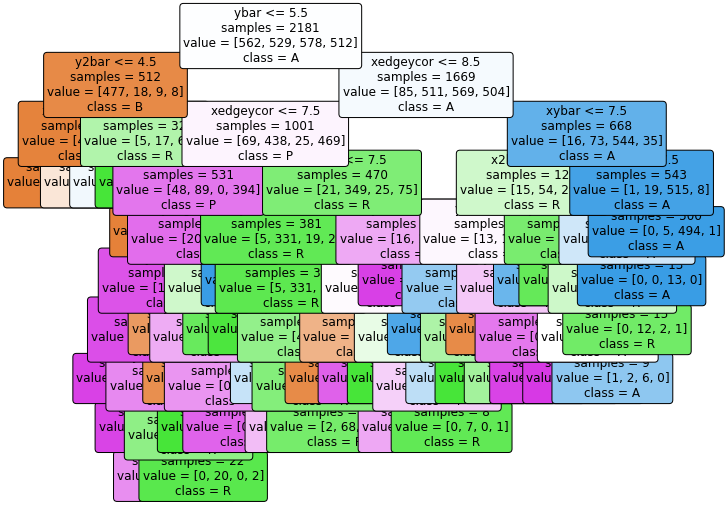

In [34]:
#Cart classification
predict_merged_cart_csf_letter=cart_classification(0.002,df_train, df_test, 'letter',['B','R','A','P'])

In [35]:
#Getting performance of CART classification model
acc_cart_csf_letter=sum(predict_merged_cart_csf_letter['Test']==predict_merged_cart_csf_letter['Predict'])/len(predict_merged_cart_csf_letter)
print('Accuracy of CART classification model for letter: ', round(acc_cart_csf_letter,4))

Accuracy of CART classification model for letter:  0.9176


### Q1.B.iii. Bagging

In [46]:
#Bagging // RF
rf_model_bagging=RandomForestClassifier(max_features=16,random_state=88)
x_train_bagging=df_train.copy().drop(columns=["letter"], axis=1)
y_train_bagging=df_train['letter']
rf_model_bagging.fit(x_train_bagging,y_train_bagging)
y_predict_rf_bagging=rf_model_bagging.predict(df_test.copy().drop(columns=["letter"]))
                           
#Output in a dataframe
predict_merged_rf_bagging_letters = pd.DataFrame(list(zip(list(df_test['letter']),list(y_predict_rf_bagging))), columns = ['Test','Predict'])

#Performance on test data
acc_rf_bagg=sum(predict_merged_rf_bagging_letters['Test']==predict_merged_rf_bagging_letters['Predict'])/len(predict_merged_rf_bagging_letters)
print("Accuracy of CART model with bagging:", round(acc_rf_bagg,4))

Accuracy of CART model with bagging: 0.9604


### #Q1.B.iv. Random Forest (multi class)

Best Parameters:  {'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}
time: 46.51 s


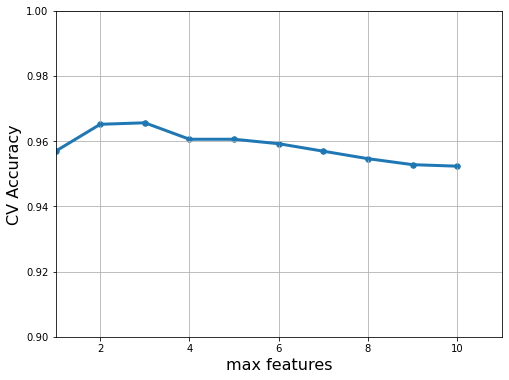

In [66]:
random_forest_gridSearch(np.linspace(1,10,10, dtype='int32'),df_train,'letter',plot_x_lims=[1, 11],plot_y_lims=[0.9,1])

In [67]:
#Fitting model based on optimal parameters from GridSearch
rf_model_letters=RandomForestClassifier(max_features=3,n_estimators=500,min_samples_leaf=5,random_state=88)
rf_model_letters.fit(df_train.copy().drop(columns=['letter'], axis=1),df_train['letter'])
y_predict_rf_letters=rf_model_letters.predict(df_test.copy().drop(columns=['letter']))
                           
#Output in a dataframe
predict_merged_rf_csf = pd.DataFrame(list(zip(list(df_test['letter']),list(y_predict_rf_letters))), columns = ['Test','Predict'])

#Performance of Random Forest Classification
accuracy_rf_letters=sum(predict_merged_rf_csf['Test']==predict_merged_rf_csf['Predict'])/len(predict_merged_rf_csf)
print("Accuracy of Random Forest model for classifying letters: ", round(accuracy_rf_letters,4))

Accuracy of Random Forest model for classifying letters:  0.9615


#### Q. Explain how you did the cross validation and how you selected the max features value.
Grid Search CV was used to iterate through different values of max_features. The final max_features was chosen so as to maximize the accuracy for the cross validation set.

### #Q.1.B.v Boosting 

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10, random_state=88) 
gbr.fit(x_train_bagging,y_train_bagging)

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300,
                           random_state=88)

In [51]:
y_pred_boost=gbr.predict(df_test.copy().drop(columns='letter',axis=1))
accuracy_boost=sum(y_pred_boost==df_test['letter'])/len(y_pred_boost)
print("Accuracy of Boosting model for classifying letters: ", round(accuracy_boost,4))

Accuracy of Boosting model for classifying letters:  0.9711


### #Q.1.C.

### Comparing performance of different models in classifying letters

In [41]:
cart_clasf_perf = ['CART Classification',acc_cart_csf_letter]
rf_perf_letters=['Random Forest',accuracy_rf_letters]
bagging_letters=['Bagging - CART', acc_rf_bagg]
boosting_letters=['GradientBoosting', accuracy_boost]
baseline_letters = ['Baseline', accuracy_baseline_letter]

round(pd.DataFrame([cart_clasf_perf,bagging_letters,rf_perf_letters,boosting_letters,baseline_letters], columns = ['Model','Accuracy']),4)

,Model,Accuracy
0,CART Classification,0.9176
1,Bagging - CART,0.9604
2,Random Forest,0.9754
3,GradientBoosting,0.9711
4,Baseline,0.2406


### Bootstrap 

In [42]:
def bootstrap_function(y_test, y_pred, sample =500, iterations=5000, random_state=88):
    df=pd.DataFrame(list(zip(list(y_test),list(y_pred))),columns = ['Test','Predict'])
    df_summary=pd.DataFrame()
    for i in range(iterations):
        df_sample=df.sample(n=sample, replace=True,axis=0)
        df_accuracy_temp=sum(df_sample['Test']==df_sample['Predict'])/500
        df_accuracy_temp_df=pd.DataFrame({'Iteration':[i],'Accuracy':df_accuracy_temp})
        df_summary=df_summary.append(df_accuracy_temp_df)       
    return df_summary

#### Function to get the bootstrapped mean, std dev and median for different models

In [43]:
#for loop to get bootstrap (mean) accuracies of all the datapoints
list_y_pred=[predict_merged_cart_csf_letter['Predict'],y_predict_rf_bagging,y_predict_rf_letters,y_pred_boost]
list_names=['CART Classification','Bagging','RandomForest','Boosting']

summary_boot_df=pd.DataFrame()
for i in range(len(list_names)):
    temp=pd.DataFrame()
    accuracies_bootstrap=bootstrap_function(y_test=df_test['letter'],y_pred=list_y_pred[i])
    acc_bootstrap_mean=np.mean(accuracies_bootstrap['Accuracy'])
    acc_bootstrap_std=np.std(accuracies_bootstrap['Accuracy'])
    acc_bootstrap_median=np.median(accuracies_bootstrap['Accuracy'])
    temp=pd.DataFrame({'Model':[list_names[i]],'Mean accuracy':[acc_bootstrap_mean],
                      'Std Deviation accuracy':[acc_bootstrap_std],'Median accuracy':[acc_bootstrap_median]})
    summary_boot_df=summary_boot_df.append(temp)

In [44]:
round(summary_boot_df,4)

,Model,Mean accuracy,Std Deviation accuracy,Median accuracy
0,CART Classification,0.9174,0.0122,0.918
0,Bagging,0.9604,0.0087,0.960
0,RandomForest,0.9753,0.0070,0.976
0,Boosting,0.9711,0.0076,0.972


Q: Which model would you recommend for this problem?  
A: Recommend the Gradient Boosting Classifier.   
Reason: The boosting model has the highest bootstrap accuracy, and the least bootstrap standard deviation. This indicates that Boosting produces low variance, high accuracy results.   

#### Confidence intervals for the Boosting model

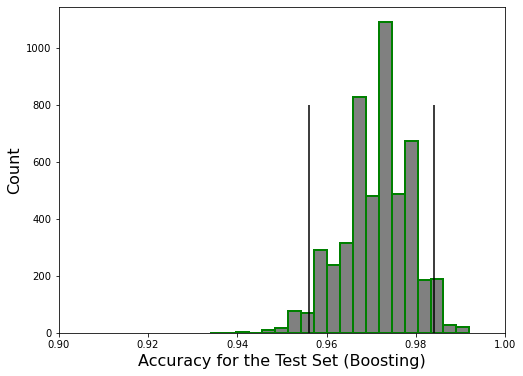

In [45]:
#Bootstrap for Random forest
boosting_accuracy_bootstrap=bootstrap_function(y_test=df_test['letter'],y_pred=y_pred_boost)

CI= np.quantile(boosting_accuracy_bootstrap['Accuracy'],np.array([0.025,0.975]))

#Plotting graph
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Accuracy for the Test Set (Boosting)', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(boosting_accuracy_bootstrap['Accuracy'], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.set_xlim([0.9,1])
axs.vlines(x=CI[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =800, color = "black")